In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections

In [3]:
# Import the graph in a  dataframe
df = pd.read_table('./net.txt', delim_whitespace=True, names=('Node', 'Link2'))

In [4]:
df

,Node,Link2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
870996,287414,287419
870997,287414,287423
870998,287415,287416
870999,287421,287424


In [5]:
df.count()

Node     871001
Link2    871001
dtype: int64

In [6]:
# creating an empty graph
G = nx.Graph()

In [7]:
for i in df.index: 
    e = (df.iloc[i, 0],df.iloc[i, 1])
    G.add_edge(*e)

In [8]:
G.number_of_nodes()

287426

In [9]:
df_final = pd.DataFrame(np.arange(287426), columns=['node'])

In [10]:
list = []
for i in range (287426):
    list.append(G.degree[i])

In [11]:
df_final['degree'] = list
df_final

,node,degree
0,0,7
1,1,19
2,2,7
3,3,8
4,4,7
...,...,...
287421,287421,3
287422,287422,1
287423,287423,2
287424,287424,1


In [12]:
d = nx.core_number(G)
od = collections.OrderedDict(sorted(d.items()))

In [13]:
df_final['kcore'] = df_final['node'].map(od)

In [14]:
df_final.set_index('node')

,degree,kcore
node,,
0,7,5
1,19,7
2,7,5
3,8,6
4,7,5
...,...,...
287421,3,1
287422,1,1
287423,2,2


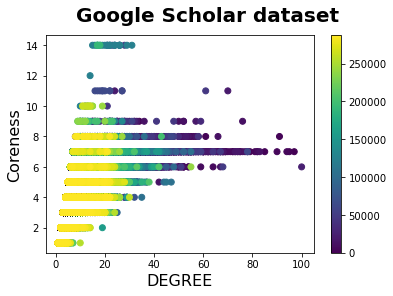

In [23]:
fig, ax = plt.subplots()

sc = ax.scatter(df_final['degree'], df_final['kcore'], c=df_final['node'])
fig.suptitle('Google Scholar dataset', fontsize=20, fontweight='bold')
ax.set_ylabel('Coreness', loc='center', fontsize=16)
ax.set_xlabel('DEGREE', loc='center', fontsize=16)
cbar = fig.colorbar(sc)
# cbar.set_label("ZLabel", loc='top')
#plt.xscale("log")
#plt.yscale("log")
plt.show()